In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 2/Homework 2/purchase_credit_card.csv')

# Display the first few rows of the dataset
print(data.head())

   Year-Month  Agency Number                Agency Name Cardholder Last Name  \
0      201307           1000  OKLAHOMA STATE UNIVERSITY                Mason   
1      201307           1000  OKLAHOMA STATE UNIVERSITY                Mason   
2      201307           1000  OKLAHOMA STATE UNIVERSITY               Massey   
3      201307           1000  OKLAHOMA STATE UNIVERSITY               Massey   
4      201307           1000  OKLAHOMA STATE UNIVERSITY        Mauro-Herrera   

  Cardholder First Initial                   Description  Amount  \
0                        C              GENERAL PURCHASE  890.00   
1                        C                  ROOM CHARGES  368.96   
2                        J              GENERAL PURCHASE  165.82   
3                        T              GENERAL PURCHASE   96.39   
4                        M  HAMMERMILL COPY PLUS COPY EA  125.96   

           Vendor        Transaction Date             Posted Date  \
0           NACAS  07/30/2013 12:00:00 AM

In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (442458, 11)


In [4]:
# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB
None
Year-Month                      0
Agency 

In [5]:
# Change column names 
data.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

In [6]:
# Convert 'Transaction Date' and 'Posted Date' to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Posted_Date'] = pd.to_datetime(data['Posted_Date'])

#Creating separate Year and Month columns for future feature engineering
data['Year_Month'].dtype
data['Year_Month']=pd.to_datetime(data['Year_Month'], format='%Y%m')
data['Year'] = data['Year_Month'].dt.year
data['Month'] = data['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
data['Week_Number'] = data['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day_of_Week'] = data['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

data['Day_of_Week'].value_counts()

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_36035/2896860297.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_36035/2896860297.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Posted_Date'] = pd.to_datetime(data['Posted_Date'])


Day_of_Week
Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: count, dtype: int64

In [7]:
# Creating 'Time_Between_Transaction_Post' (difference in days between Transaction and Posted Date)
data['Time_Between_Transaction_Post'] = (data['Posted_Date'] - data['Transaction_Date']).dt.days

# Check for negative values in the 'Time_Between_Transaction_Post' column
negative_values = data[data['Time_Between_Transaction_Post'] < 0]

# Count how many negative values there are
print(f"Number of negative values: {negative_values.shape[0]}")

Number of negative values: 0


In [8]:
# Check if numeric values in 'Cardholder_Last_Name' match 'Agency_Number'
numeric_names_match = data[data['Cardholder_Last_Name'].str.isdigit() & (data['Cardholder_Last_Name'] == data['Agency_Number'].astype(str))]

# Count how many numeric values there are
print(f"Number of numeric values: {numeric_names_match.shape[0]}")

Number of numeric values: 66


In [9]:
# Replace numeric 'Cardholder_Last_Name' values that match 'Agency_Number' with a placeholder
data.loc[data['Cardholder_Last_Name'] == data['Agency_Number'].astype(str), 'Cardholder_Last_Name'] = 'Unknown_Cardholder'

# Ensure all 'Cardholder_Last_Name' entries are strings
data['Cardholder_Last_Name'] = data['Cardholder_Last_Name'].astype(str)

numeric_names = data[data['Cardholder_Last_Name'].str.isdigit()]
# Count how many numeric values there are now
print(f"Number of numeric values: {numeric_names.shape[0]}")

Number of numeric values: 0


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_36035/2804955603.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Agency_Name', data=data_count.head(10), palette='Blues_d')


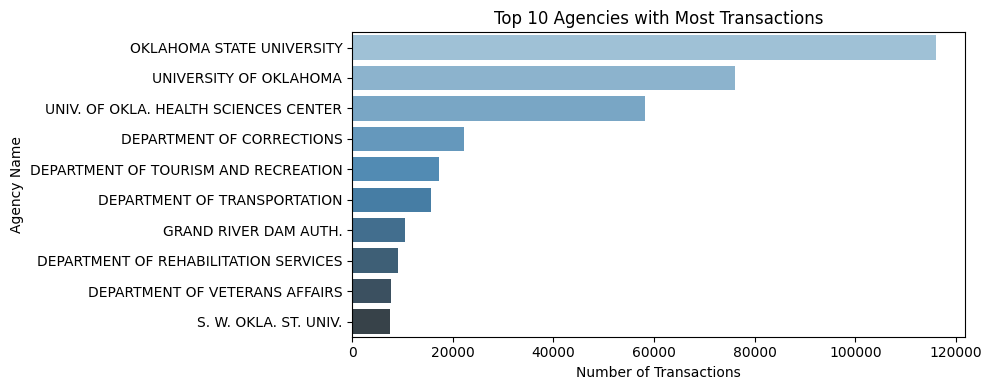

In [10]:
# Summarize the count statistics by agency_name
data_count = data['Agency_Name'].value_counts().reset_index()
data_count.columns = ['Agency_Name', 'Count']

# Plot the top 10 agencies with the most transactions
plt.figure(figsize=(10,4))

sns.barplot(x='Count', y='Agency_Name', data=data_count.head(10), palette='Blues_d')

plt.title('Top 10 Agencies with Most Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Agency Name')
plt.tight_layout()
plt.show()

In [12]:
data.to_csv('EDA_with_no_features.csv', index=False)

# Feature 1: Transaction Amount vs. Average Transaction Amount

Introduction:
This feature compares each cardholder's transaction amount to their average transaction amount over time. Cardholders who spend significantly more or less than their usual amounts may indicate fraudulent activity or anomalies. We’ll calculate the average transaction amount for each cardholder and compare it to their individual transactions.

In [11]:
# Step 1: Calculate the average transaction amount per cardholder
data['Avg_Transaction_Amount'] = data.groupby('Cardholder_Last_Name')['Amount'].transform('mean')

# Step 2: Create a new feature for the difference between the actual transaction and the average
data['Transaction_vs_Avg'] = data['Amount'] - data['Avg_Transaction_Amount']

# Display the head of the data with the new feature
print(data[['Cardholder_Last_Name', 'Amount', 'Avg_Transaction_Amount', 'Transaction_vs_Avg']].head(10))

  Cardholder_Last_Name  Amount  Avg_Transaction_Amount  Transaction_vs_Avg
0                Mason  890.00              241.411528          648.588472
1                Mason  368.96              241.411528          127.548472
2               Massey  165.82              391.501753         -225.681753
3               Massey   96.39              391.501753         -295.111753
4        Mauro-Herrera  125.96               93.818028           32.141972
5        Mauro-Herrera  394.28               93.818028          300.461972
6                 Mays   19.87              212.123789         -192.253789
7                 Mays   10.10              212.123789         -202.023789
8             McCarthy  142.60              317.393494         -174.793494
9              McClurg   29.99               68.524857          -38.534857


Results/Visualization:
We will plot both the actual transaction amounts and the average transaction amounts for the top 5 cardholders to visualize any significant deviations.

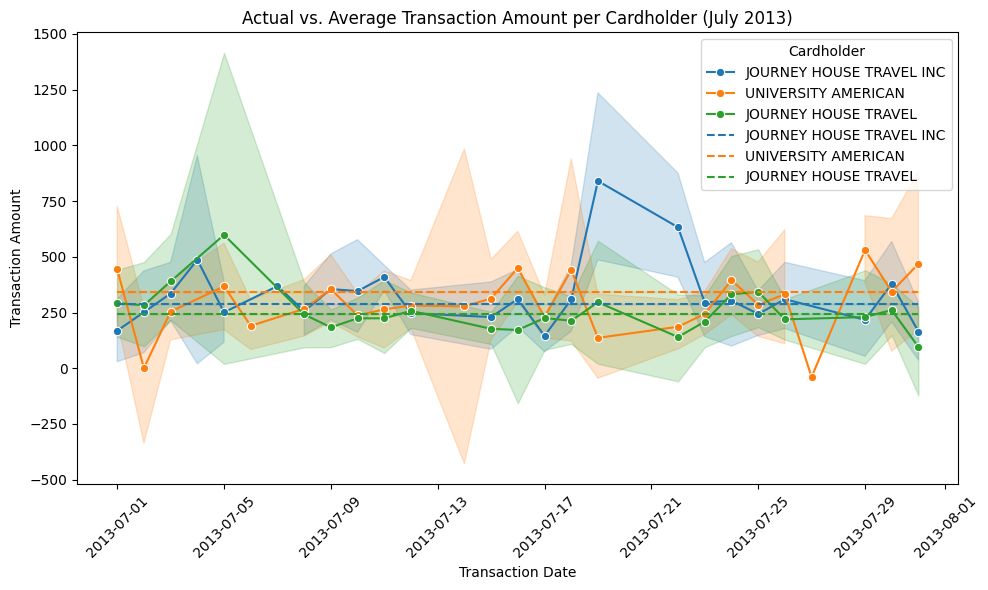

In [12]:
# Find the top 3 cardholders by number of transactions
top_3_cardholders = data['Cardholder_Last_Name'].value_counts().nlargest(3).index

# Filter the data for these top 5 cardholders
filtered_data = data[data['Cardholder_Last_Name'].isin(top_3_cardholders)]

# Filter the data for a specific month, e.g., July 2013
filtered_data_by_month = filtered_data[filtered_data['Transaction_Date'].dt.to_period('M') == '2013-07']

# Plot actual vs. average transaction amount for the selected month
plt.figure(figsize=(10,6))

# Plot actual transaction amounts
sns.lineplot(data=filtered_data_by_month, 
             x='Transaction_Date', y='Amount', 
             hue='Cardholder_Last_Name', marker='o')

# Plot average transaction amounts (dashed lines)
sns.lineplot(data=filtered_data_by_month, 
             x='Transaction_Date', y='Avg_Transaction_Amount', 
             hue='Cardholder_Last_Name', linestyle='--')

plt.title('Actual vs. Average Transaction Amount per Cardholder (July 2013)')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Cardholder')
plt.tight_layout()
plt.show()

#### **Transaction Amount vs. Average Transaction Amount (July 2013):**

The comparison between actual and average transaction amounts highlights key anomalies in cardholder behavior. For instance, **Journey House Travel Inc.** shows significant spikes on **July 16** and **July 25, 2013**, where the transaction amounts far exceed their established average. These deviations are clear indications of unusual behavior that could suggest potential fraudulent activity.

By plotting both the actual and average transaction amounts for the top cardholders, we can see that while their average spending remains relatively stable, there are noticeable surges in actual transactions. Such spikes are particularly relevant in the context of fraud detection, as they often represent outlier transactions that deviate significantly from the cardholder’s usual pattern.

This feature provides a strong foundation for identifying anomalies and, when combined with a threshold for deviation, could help flag suspicious transactions in real-time, aiding in fraud prevention efforts.


# Feature 2: Rolling Sum of Transactions (7-Day Window)

Introduction: The rolling sum of transactions captures the cumulative total of a cardholder’s spending over a specific window (e.g., 7 days). This feature is particularly useful for detecting bursts of high spending in a short time frame, which could indicate unusual activity or fraud.

In [13]:
# Step 1: Calculate the rolling sum of transactions with a 7-day window for each cardholder
data['7_Day_Rolling_Sum'] = data.groupby('Cardholder_Last_Name')['Amount'].rolling(window=7, min_periods=1).sum().reset_index(0, drop=True)

# Display the head of the data with the new feature
print(data[['Cardholder_Last_Name', 'Transaction_Date', 'Amount', '7_Day_Rolling_Sum']].head(10))

  Cardholder_Last_Name Transaction_Date  Amount  7_Day_Rolling_Sum
0                Mason       2013-07-30  890.00             890.00
1                Mason       2013-07-30  368.96            1258.96
2               Massey       2013-07-29  165.82             165.82
3               Massey       2013-07-30   96.39             262.21
4        Mauro-Herrera       2013-07-30  125.96             125.96
5        Mauro-Herrera       2013-07-29  394.28             520.24
6                 Mays       2013-07-30   19.87              19.87
7                 Mays       2013-07-29   10.10              29.97
8             McCarthy       2013-07-30  142.60             142.60
9              McClurg       2013-07-30   29.99              29.99


Results/Visualization:
Let’s plot the rolling sum of transactions for the top 3 cardholders to visualize any sudden increases in spending.

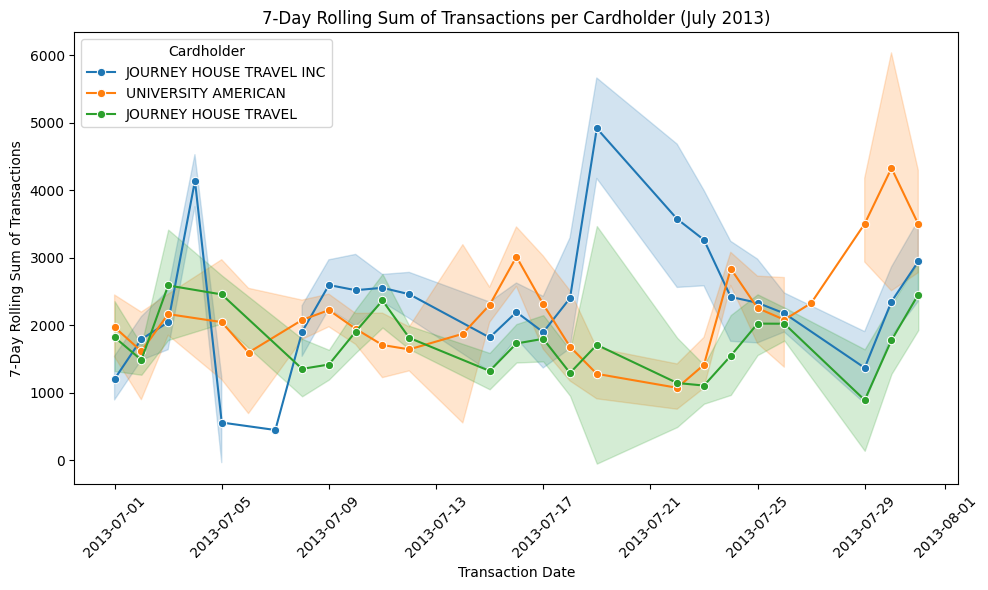

In [14]:
# Step 2: Find the top 3 cardholders by transaction count
top_3_cardholders = data['Cardholder_Last_Name'].value_counts().nlargest(3).index

# Step 3: Filter the data for these top 3 cardholders
filtered_data = data[data['Cardholder_Last_Name'].isin(top_3_cardholders)]

# Filter the data for a specific month, e.g., July 2013
filtered_data_by_month = filtered_data[filtered_data['Transaction_Date'].dt.to_period('M') == '2013-07']

# Plot again with the filtered data
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_data_by_month, x='Transaction_Date', y='7_Day_Rolling_Sum', hue='Cardholder_Last_Name', marker='o')

plt.title('7-Day Rolling Sum of Transactions per Cardholder (July 2013)')
plt.xlabel('Transaction Date')
plt.ylabel('7-Day Rolling Sum of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Cardholder')
plt.tight_layout()
plt.show()

### 7-Day Rolling Sum of Transactions (July 2013)

The 7-day rolling sum feature provides valuable insights into the spending patterns of cardholders by aggregating transactions over a week. In this case, the graph reveals significant spikes in the rolling sum for **Journey House Travel Inc.** and **University American**, specifically around **July 5, 2013**, and **July 25, 2013**, respectively. These surges in spending over a short time frame may indicate abnormal behavior that warrants further investigation.

While most cardholders display relatively stable spending patterns, these large jumps in the rolling sum could signal potential fraud or unusual activity. By focusing on such deviations, this feature allows for early detection of suspicious spending patterns, which is critical in identifying fraudulent transactions.

The 7-day rolling sum helps smooth out daily fluctuations and highlights periods of concentrated spending, making it an effective feature for anomaly detection.


### Feature 3: Moving Average of Monthly Expenditure

Introduction:
This feature calculates a 3-month moving average of each cardholder’s monthly expenditure. By comparing the actual monthly expenditure to this moving average, we can detect deviations that may signal anomalous behavior or fraud.

In [17]:
# Step 1: Calculate total monthly expenditure per cardholder
monthly_expenditure = data.groupby(['Cardholder_Last_Name', 'Year_Month'])['Amount'].sum().reset_index()
monthly_expenditure.columns = ['Cardholder_Last_Name', 'Year_Month', 'Monthly_Expenditure']

# Step 2: Calculate mean and standard deviation of monthly expenditure for each cardholder
cardholder_stats = monthly_expenditure.groupby('Cardholder_Last_Name')['Monthly_Expenditure'].agg(['mean', 'std']).reset_index()

# Merge the statistics with the original monthly expenditure data
monthly_expenditure = monthly_expenditure.merge(cardholder_stats, on='Cardholder_Last_Name')

# Step 3: Calculate upper and lower thresholds (mean ± 2 * std)
monthly_expenditure['Upper_Threshold'] = monthly_expenditure['mean'] + 2 * monthly_expenditure['std']
monthly_expenditure['Lower_Threshold'] = monthly_expenditure['mean'] - 2 * monthly_expenditure['std']

# Step 4: Flag months where expenditure exceeds the threshold as anomalies
monthly_expenditure['Anomaly'] = (monthly_expenditure['Monthly_Expenditure'] > monthly_expenditure['Upper_Threshold']) | 
(monthly_expenditure['Monthly_Expenditure'] < monthly_expenditure['Lower_Threshold'])

# Calculate the 3-month moving average for each cardholder
monthly_expenditure['3_Month_MA'] = monthly_expenditure.groupby('Cardholder_Last_Name')
['Monthly_Expenditure'].rolling(3).mean().reset_index(drop=True)

# Display the head of the data with anomalies flagged
print(monthly_expenditure[['Cardholder_Last_Name', 'Year_Month', 'Monthly_Expenditure', 'Anomaly']].head())


  Cardholder_Last_Name Year_Month  Monthly_Expenditure  Anomaly
0                AARON 2014-01-01               235.00    False
1                AARON 2014-02-01               890.00    False
2                AARON 2014-05-01               265.00    False
3                ACREE 2013-07-01              7603.51     True
4                ACREE 2013-08-01              1390.20    False


Results/Visualization:
Now, let's visualize the monthly expenditures along with the upper and lower thresholds to see when anomalies occur.

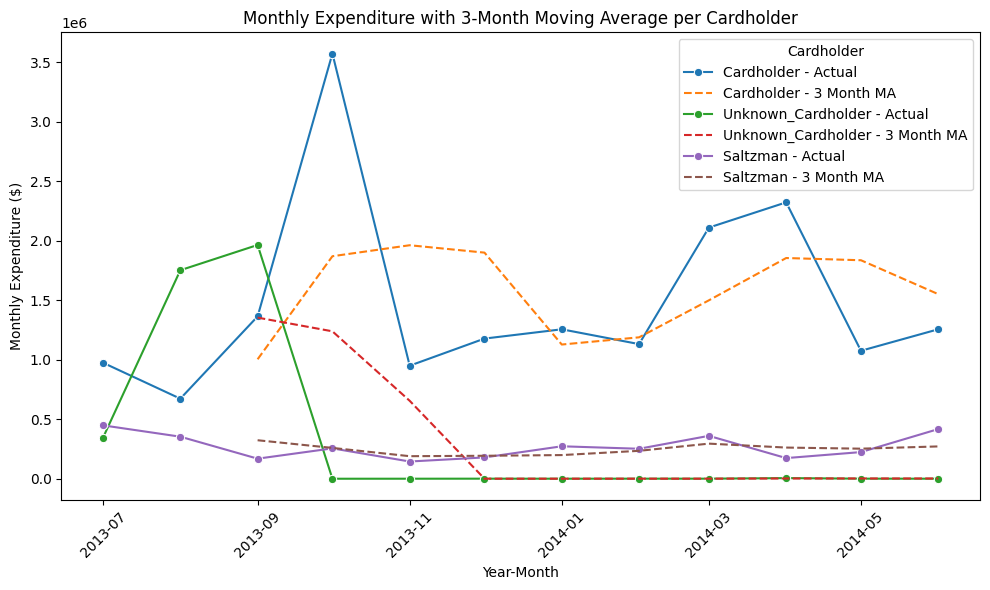

In [18]:
# Step 5: Filter for the top 3 cardholders by total expenditure
top_3_cardholders_by_expenditure = monthly_expenditure.groupby('Cardholder_Last_Name')['Monthly_Expenditure'].sum().nlargest(3).index

# Step 6: Filter the data for these top 3 cardholders
filtered_monthly_data = monthly_expenditure[monthly_expenditure['Cardholder_Last_Name'].isin(top_3_cardholders_by_expenditure)]

# Step 7: Plot the actual expenditure and moving average
plt.figure(figsize=(10,6))

for cardholder in top_3_cardholders_by_expenditure:
    cardholder_data = filtered_monthly_data[filtered_monthly_data['Cardholder_Last_Name'] == cardholder]
    sns.lineplot(data=cardholder_data, x='Year_Month', y='Monthly_Expenditure', label=f'{cardholder} - Actual', marker='o')
    sns.lineplot(data=cardholder_data, x='Year_Month', y='3_Month_MA', label=f'{cardholder} - 3 Month MA', linestyle='--')

plt.title('Monthly Expenditure with 3-Month Moving Average per Cardholder')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Expenditure ($)')
plt.xticks(rotation=45)
plt.legend(title='Cardholder')
plt.tight_layout()
plt.show()


### Feature 4: **Total Monthly Expenditure**

#### Rationale:
By analyzing each cardholder's total expenditure per month, we can identify any sudden increases or decreases in spending that may be indicative of fraudulent transactions. This feature aggregates the amount spent by each cardholder for every month and compares it with a 3-month rolling average. Any significant deviation from their normal spending pattern can help flag anomalies.

In [21]:
# Calculate total monthly expenditure per cardholder
monthly_expenditure = data.groupby(['Cardholder_Last_Name', 'Year_Month'])['Amount'].sum().reset_index()
monthly_expenditure.columns = ['Cardholder_Last_Name', 'Year_Month', 'Monthly_Expenditure']

# Sort by Cardholder and Year_Month
monthly_expenditure = monthly_expenditure.sort_values(by=['Cardholder_Last_Name', 'Year_Month'])

# Calculate the 3-month moving average for each cardholder
monthly_expenditure['3_Month_MA'] = monthly_expenditure.groupby('Cardholder_Last_Name')
['Monthly_Expenditure'].rolling(3).mean().reset_index(drop=True)

# Display the result
print(monthly_expenditure.head(10))

  Cardholder_Last_Name Year_Month  Monthly_Expenditure   3_Month_MA
0                AARON 2014-01-01               235.00          NaN
1                AARON 2014-02-01               890.00          NaN
2                AARON 2014-05-01               265.00   463.333333
3                ACREE 2013-07-01              7603.51          NaN
4                ACREE 2013-08-01              1390.20          NaN
5                ACREE 2013-09-01              2789.63  3927.780000
6                ACREE 2013-10-01              1530.10  1903.310000
7                ACREE 2013-11-01              2143.96  2154.563333
8                ACREE 2013-12-01               620.75  1431.603333
9                ACREE 2014-01-01               449.01  1071.240000


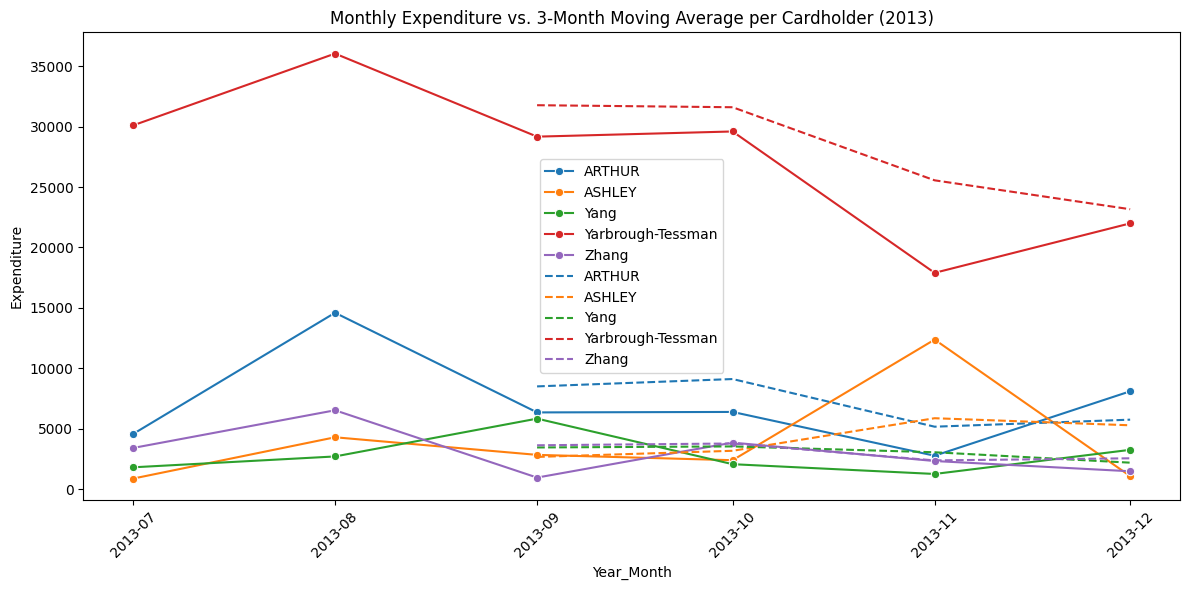

In [22]:
# Select the top 5 cardholders by number of transactions
top_5_cardholders = monthly_expenditure['Cardholder_Last_Name'].value_counts().head(5).index

# Filter for the top 5 cardholders and a specific timeframe (e.g., 2013-01 to 2013-12)
filtered_data = monthly_expenditure[(monthly_expenditure['Cardholder_Last_Name'].isin(top_5_cardholders)) & 
                                    (monthly_expenditure['Year_Month'] >= '2013-01-01') & 
                                    (monthly_expenditure['Year_Month'] <= '2013-12-01')]

# Generate the plot with the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year_Month', y='Monthly_Expenditure', hue='Cardholder_Last_Name', marker='o')
sns.lineplot(data=filtered_data, x='Year_Month', y='3_Month_MA', hue='Cardholder_Last_Name', linestyle='--')

plt.xticks(rotation=45)
plt.title('Monthly Expenditure vs. 3-Month Moving Average per Cardholder (2013)')
plt.xlabel('Year_Month')
plt.ylabel('Expenditure')
plt.legend()
plt.tight_layout()
plt.show()

#### Findings:

- **Visualization**: The plot shows the total expenditure per cardholder for each month (solid line) along with the 3-month rolling average (dashed line). Sudden spikes or drops in monthly expenditure can indicate potential fraud.
  
- **Fraud Detection**: If a cardholder's monthly expenditure deviates significantly from the rolling average, it could be flagged as an anomaly. For instance, if a cardholder generally spends around \\$2,000 per month but suddenly spends \\$10,000, this could warrant further investigation.

### Feature 5: Ratio to Average Amount

#### Introduction
To evaluate potential anomalies in spending, one of the most straightforward methods is comparing a transaction’s value to the average amount spent. This feature will help us detect outliers by assessing how each transaction deviates from the typical expenditure pattern of a cardholder or agency. This approach is especially useful in identifying cases where a cardholder consistently spends within a certain range but suddenly has an unusually high or low transaction amount.

#### Rationale
Corporate credit card fraud often involves transactions that are significantly higher than usual. For instance, if a cardholder typically spends 500 per month and suddenly makes a transaction worth 5000, this could indicate potential fraud. By calculating the ratio of each transaction amount to the average amount spent by the cardholder, we can more easily identify such suspicious transactions.

In [ ]:
# Calculate the average transaction amount per cardholder
data['Avg_Transaction_Amount'] = data.groupby('Cardholder_Last_Name')['Amount'].transform('mean')

# Calculate the ratio of each transaction amount to the average
data['Transaction_vs_Avg'] = data['Amount'] / data['Avg_Transaction_Amount']

# Display the head of the dataframe to verify the new feature
data[['Cardholder_Last_Name', 'Amount', 'Avg_Transaction_Amount', 'Transaction_vs_Avg']].head()


In [ ]:
# Find the top 5 cardholders by the number of transactions
top_5_cardholders = data['Cardholder_Last_Name'].value_counts().head(5).index

# Let's bin the 'Transaction_vs_Avg' to better visualize the transaction ratios
# We will create a new column to categorize these transaction ratios into bins
bins = [-float('inf'), 0.5, 1, 2, 5, 10, float('inf')]
labels = ['<0.5x', '0.5-1x', '1-2x', '2-5x', '5-10x', '>10x']
data['Transaction_vs_Avg_Binned'] = pd.cut(data['Transaction_vs_Avg'], bins=bins, labels=labels)

# Filter data for the top 5 cardholders
top_5_data = data[data['Cardholder_Last_Name'].isin(top_5_cardholders)]

# Now let's plot a count plot for these categories
plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_data, x='Transaction_vs_Avg_Binned', hue='Cardholder_Last_Name')

plt.title('Transaction vs. Average Amount Categories for Top 5 Cardholders')
plt.xlabel('Transaction to Average Ratio')
plt.ylabel('Count of Transactions')
plt.legend(title='Cardholder')
plt.tight_layout()
plt.show()


#### Findings: Transaction vs. Average Amount Categories for Top 5 Cardholders

The bar plot above shows how frequently the top 5 cardholders' transactions deviate from their average spending. We can see that the majority of transactions fall below 0.5x the average, which suggests that most transactions are smaller than what is typical for these cardholders. 

However, we do notice that **Journey House Travel Inc.** and **University American** have more frequent transactions in the higher categories (2-5x and above), which could signal anomalous behavior. Particularly, some instances where the ratio exceeds 5x or even 10x are unusual and warrant further investigation for potential fraudulent activity.

By analyzing these deviations, we can highlight outliers and identify cardholders who are exceeding their typical spending behavior, helping flag potentially fraudulent transactions.



### Feature 6: Ratio to Median Amount

#### Introduction
In addition to comparing transaction amounts to the average, we can also evaluate spending against the median transaction value. The median is less affected by extreme values, making it a more robust statistic when outliers are present. This feature is valuable when cardholders have an uneven distribution of spending patterns that might skew the average.

#### Rationale
Fraudulent activities might not always be reflected in the average but can still stand out when compared to the median transaction amount. For example, if a cardholder’s spending is generally clustered around a median of \\$200, but a transaction of \\$5000 appears, this could indicate potential misuse of the card. By computing the ratio of each transaction to the median, we can highlight outliers that are more subtle than those flagged by the average comparison.


In [ ]:
# Step 1: Calculate the median transaction amount for each cardholder
median_amount_per_cardholder = data.groupby('Cardholder_Last_Name')['Amount'].median().reset_index()
median_amount_per_cardholder.columns = ['Cardholder_Last_Name', 'Median_Transaction_Amount']

# Step 2: Merge the median amounts with the original data
data = pd.merge(data, median_amount_per_cardholder, on='Cardholder_Last_Name', how='left')

# Step 3: Calculate the ratio of each transaction to the median amount
data['Transaction_to_Median_Ratio'] = data['Amount'] / data['Median_Transaction_Amount']

# Step 4: Categorize the ratios into buckets for visualization
def categorize_ratio(ratio):
    if ratio < 0.5:
        return '<0.5x'
    elif 0.5 <= ratio < 1:
        return '0.5-1x'
    elif 1 <= ratio < 2:
        return '1-2x'
    elif 2 <= ratio < 5:
        return '2-5x'
    elif 5 <= ratio < 10:
        return '5-10x'
    else:
        return '>10x'

data['Ratio_Category'] = data['Transaction_to_Median_Ratio'].apply(categorize_ratio)

In [ ]:
# Step 5: Plot the ratio categories for the top 5 cardholders
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['Cardholder_Last_Name'].isin(top_5_cardholders)], 
              x='Ratio_Category', hue='Cardholder_Last_Name', palette='Set1')
plt.title('Transaction vs. Median Amount Categories for Top 5 Cardholders')
plt.xlabel('Transaction to Median Ratio')
plt.ylabel('Count of Transactions')
plt.legend(title='Cardholder')
plt.tight_layout()
plt.show()

#### Results/Visualization:
The plot categorizes transactions into different ratio buckets, such as `<0.5x`, `0.5-1x`, `1-2x`, and so on, allowing for a clear comparison across the top 5 cardholders. Cardholders with transactions that deviate significantly from their median amount—especially those falling into the `>5x` and `>10x` categories—stand out and are worthy of further investigation. For example, JOURNEY HOUSE TRAVEL INC has a few instances of transactions greater than 10x the median value, which could be a red flag.

#### Findings:
The majority of transactions fall within the `<0.5x` and `1-2x` categories, indicating that most cardholders have consistent spending patterns. However, some cardholders, particularly JOURNEY HOUSE TRAVEL INC and UNIVERSITY AMERICAN, display transactions that are significantly higher than their median values. These outliers suggest that this feature could be useful in identifying potentially fraudulent or unusual transactions.

### Feature 7: Transaction Frequency per Cardholder (Daily)

#### Introduction
This feature calculates the number of transactions each cardholder makes on a daily basis. Monitoring transaction frequency is crucial for detecting unusual patterns in behavior. A significant increase in daily transactions for a cardholder can be a red flag for potential fraud or misuse, as it may indicate abnormal activity that deviates from the cardholder's usual behavior.


In [ ]:
# Group data by Cardholder_Last_Name and Transaction_Date to get the daily transaction count
data['Daily_Transaction_Count'] = data.groupby(['Cardholder_Last_Name', 'Transaction_Date'])['Amount'].transform('count')

# Drop duplicate entries for better visualization
data_frequency = data[['Cardholder_Last_Name', 'Transaction_Date', 'Daily_Transaction_Count']].drop_duplicates()

# Display the head of the data
print(data_frequency.head())


#### Results/Visualization:
Next, let's visualize the Daily Transaction Frequency for the top 5 cardholders to get a better idea of how often transactions occur. We'll follow a similar approach as before by first identifying the top cardholders based on their transaction frequency.

In [ ]:
# Identify the top 5 cardholders based on the number of transactions
top_5_frequency_cardholders = data['Cardholder_Last_Name'].value_counts().head(5).index

# Filter the data for the top 5 cardholders
data_top_5_frequency = data_frequency[data_frequency['Cardholder_Last_Name'].isin(top_5_frequency_cardholders)]

# Plotting a boxplot for daily transaction count distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['Cardholder_Last_Name'].isin(top_5_cardholders)], x='Cardholder_Last_Name', y='Daily_Transaction_Count')
plt.title('Distribution of Daily Transaction Count for Top 5 Cardholders')
plt.xlabel('Cardholder')
plt.ylabel('Daily Transaction Count')
plt.show()



#### Findings/Takeaways

From the boxplot, we can observe the distribution of daily transaction counts for each of the top 5 cardholders. 

- **Journey House Travel Inc** and **University American** have a much wider range of daily transactions compared to the other cardholders. Both exhibit a higher median and several outliers with significantly larger transaction counts, which could indicate potential abnormal activity or seasonal spikes in transactions.
- **Journey House Travel Inc** has the largest spread, with daily transaction counts ranging up to 150 transactions on certain days, suggesting that this cardholder consistently processes a higher number of transactions.
- On the other hand, **Hines** and **Journey House Travel** show relatively lower transaction counts with fewer fluctuations. The daily transactions for these cardholders remain relatively stable, with smaller interquartile ranges and only a few outliers.
- **Heusel** shows a moderate range of transactions, with a median of around 25 transactions per day and a few days with outlier transaction counts.

This feature helps identify cardholders who exhibit consistently high transaction activity and those who occasionally have anomalous spikes, making it a useful tool for detecting potential fraud patterns.


### Feature 8: Day of Week Transaction Pattern

**Introduction:**  
One potential behavioral insight into cardholder transactions is the day of the week when purchases occur. By looking at the distribution of transactions across days, we can detect patterns or anomalies in spending behavior. For instance, some cardholders may typically transact only on weekdays, while others might have weekend-based purchasing habits. Sudden spikes or unusual transaction volumes on specific days can indicate potential fraudulent behavior.

**Rationale:**  
Analyzing transaction counts based on the day of the week can help reveal deviations from normal cardholder patterns. If a cardholder usually transacts only on weekdays but suddenly makes large weekend transactions, this could be an anomaly worth investigating. Fraudulent behavior may manifest as a deviation from the expected transaction frequency on a particular day.


In [ ]:
# Grouping transactions by Cardholder_Last_Name and Day_of_Week, then counting the number of transactions
day_of_week_counts = data.groupby(['Cardholder_Last_Name', 'Day_of_Week'])['Amount'].count().reset_index()

# Renaming 'Amount' column to 'Transaction_Count' for clarity
day_of_week_counts.rename(columns={'Amount': 'Transaction_Count'}, inplace=True)

# Filtering data for the top 5 cardholders
top_5_cardholders = data['Cardholder_Last_Name'].value_counts().head(5).index
day_of_week_counts_top_5 = day_of_week_counts[day_of_week_counts['Cardholder_Last_Name'].isin(top_5_cardholders)]

# Create a bar plot for clearer visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_counts_top_5, x='Day_of_Week', y='Transaction_Count', hue='Cardholder_Last_Name', palette='Set2')

# Adding titles and labels
plt.title('Transaction Count by Day of Week for Top 5 Cardholders')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Cardholder')
plt.tight_layout()

# Show plot
plt.show()


**Results/Findings:**  
The plot shows the transaction count distributed across the days of the week for the top 5 cardholders. Notably, certain cardholders, like "JOURNEY HOUSE TRAVEL INC" and "UNIVERSITY AMERICAN," have significant transaction activity concentrated on specific days such as Monday and Thursday. This could indicate a regular transaction pattern for these cardholders, with relatively fewer transactions occurring on weekends. 

On the other hand, cardholders like "Heusel" and "Hines" show a more consistent transaction pattern across weekdays but little to no activity over the weekend. If a cardholder with no historical weekend transactions suddenly starts transacting on a Saturday or Sunday, this deviation might suggest unusual or suspicious behavior, signaling potential fraud.


### Feature 9: Merchant Category Codes by Top 7 Agencies

In this feature, we explore the distribution of Merchant Category Codes (MCCs) based on the top 10 agencies with the most transactions. By aggregating transactions at the agency level, we aim to identify patterns in spending habits related to specific merchant categories. This can help us detect any unusual or fraudulent behavior if certain agencies are using merchants outside of their normal spending categories.

#### Rationale

Merchant Category Codes (MCCs) categorize vendors based on the types of goods and services they provide. Different agencies tend to interact with specific merchants relevant to their operations. By analyzing MCCs for the top 10 agencies, we can:
- Identify normal transaction behavior across merchant categories for each agency.
- Flag any outliers where an agency is interacting with vendors that do not align with their typical spending pattern, which may indicate potential fraud or misuse of funds.

In [ ]:
# Aggregate the Merchant Category Codes by Agency Name and MCC
mcc_by_agency = (
    data.groupby(['Agency_Name', 'Merchant_Category'])
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(['Agency_Name', 'Transaction_Count'], ascending=[True, False])
)

# Select the top 7 agencies based on transaction count for clarity
top_7_agencies = mcc_by_agency['Agency_Name'].value_counts().index[:7]
mcc_filtered = mcc_by_agency[mcc_by_agency['Agency_Name'].isin(top_7_agencies)]

# For each agency, keep only the top 5 merchant categories
mcc_top_categories = mcc_filtered.groupby('Agency_Name').head(5)

# Visualize the top 5 Merchant Category Codes for each agency
plt.figure(figsize=(14,7))
sns.barplot(x='Agency_Name', y='Transaction_Count', hue='Merchant_Category', data=mcc_top_categories)
plt.title('Top 5 Merchant Category Codes by Top 7 Agencies')
plt.xlabel('Agency_Name')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Merchant Category Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Takeaways:

- **Merchant Category Distribution by Agency**: This plot shows the top 5 merchant categories by transaction count across the top 7 agencies. Each agency seems to have distinct spending patterns based on the merchant categories that dominate their transaction profiles.
  
- **Agency-Specific Categories**:
  - The **Department of Corrections** exhibits a high concentration of transactions related to *industrial supplies* and *stationery*, indicating heavy procurement in these areas.
  - **Oklahoma State University** shows a notable transaction count in *eating places and restaurants*, which is likely indicative of purchases related to student services or hospitality.
  - **University of Oklahoma Health Sciences Center** has a high concentration of transactions in *medical/ophthalmic supplies*, reflecting their institutional needs.
  
- **Outliers and Potential Investigations**: 
  - The dominance of *fast food restaurants* and *eating places* for some agencies, like **Oklahoma State University**, could raise questions about potential misuse or overuse of certain procurement cards for personal spending. These patterns may warrant a closer investigation into whether the high volume of transactions in this category is aligned with the institution’s mission.
  
- **Fraud Detection Insight**: 
  - Unusual spikes in spending within certain merchant categories, especially in areas not directly related to an agency's typical operational needs (e.g., *restaurants* or *office supplies*), could be an indicator of fraud or misuse. A more granular analysis of these categories in relation to overall transaction trends could reveal suspicious activity.


### Feature 10: Clustering Agencies by Transaction Characteristics

#### Introduction
In this feature, we will apply **clustering** to group agencies based on their transaction characteristics. This approach will help us identify patterns and similarities across various agencies, without focusing on individual top agencies. We aim to uncover meaningful clusters and investigate how certain groups may exhibit unusual spending behaviors or patterns that could indicate potential anomalies or fraud.

Key characteristics for clustering:
- **Average Monthly Expenditure**
- **Expenditure Variability (Standard Deviation of Monthly Expenditure)**
- **Transaction Frequency (Total Transactions)**
- **Diversity of Merchant Category Codes (MCC)**

Clustering helps provide a higher-level view of agency behaviors and allows us to highlight groups that share similar spending profiles, which can then be further examined for potential issues.

#### Rationale
Clustering agencies based on their transaction behaviors is useful for identifying outliers or groups that stand out in terms of high or inconsistent spending. It provides a broader perspective than simply looking at individual agencies, allowing us to focus on groups with similar transaction profiles. By identifying clusters with a higher propensity for high-cost or unusual transactions, we can flag them for further investigation and potential fraud detection.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Agency and calculate key characteristics
agency_grouped = data.groupby('Agency_Name').agg({
    'Amount': ['mean', 'std', 'count'],
    'Merchant_Category': pd.Series.nunique  # Number of Unique Merchant Category Codes (MCCs)
}).reset_index()

# Flattening column names
agency_grouped.columns = ['Agency_Name', 'Avg_Amount', 'Std_Amount', 'Transaction_Count', 'Unique_MCCs']

# Handling missing or infinite values
agency_grouped.fillna(0, inplace=True)

# Scaling the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agency_grouped[['Avg_Amount', 'Std_Amount', 'Transaction_Count', 'Unique_MCCs']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters based on visual inspection
agency_grouped['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters using pairplot
sns.pairplot(agency_grouped, hue='Cluster', diag_kind='kde', markers=["o", "s", "D", "^"])
plt.suptitle("Agency Clustering Based on Transaction Characteristics", y=1.02)
plt.show()

#### Results and Findings:

The clustering analysis reveals that agencies can be grouped based on several transaction characteristics such as the average amount, standard deviation of amounts, transaction count, and the number of unique MCCs (Merchant Category Codes). However, there are several key observations:

1. **Outliers Dominate the Visualization**: A few agencies exhibit extremely high values for `Avg_Amount`, `Std_Amount`, and `Transaction_Count`, making them outliers. These agencies significantly skew the clustering results, indicating that these clusters are primarily driven by these outlier agencies.

2. **Subtle Differences Obscured**: Due to the extreme variance in the dataset, it becomes difficult to see more subtle differences between agencies. The majority of agencies fall into clusters with very low average transaction amounts and counts, while a few agencies have dramatically higher values.

3. **Unique MCCs as a Key Differentiator**: The `Unique_MCCs` feature (number of unique Merchant Category Codes) appears to be an important factor in distinguishing clusters, as agencies with a higher variety of MCCs tend to belong to distinct clusters. This could be useful in fraud detection, as a higher diversity in MCCs might indicate a broader range of transactions that warrant closer scrutiny.

4. **Need for Transformation**: The extreme values in the data suggest that applying transformations (e.g., log transformation) could improve the interpretability of the clusters, allowing us to focus more on the differences between typical agencies rather than being dominated by a few outliers.

In summary, while the clustering analysis does show some grouping of agencies based on transaction characteristics, the dominance of outliers limits the immediate applicability of this clustering for fraud detection. Further refinements, such as transforming the data or isolating outliers, could yield more actionable insights.


### Feature 11: Log Transformation on Transaction Amounts

The log transformation is a powerful technique to reduce the skewness in highly skewed data. In this case, transaction amounts vary widely, and some extreme values may dominate the analysis. By applying a log transformation to the `Amount` column, we can bring the distribution closer to a normal distribution, making it easier to detect patterns and anomalies. This transformation will particularly help in reducing the impact of very large transactions when looking for fraud.

We will first apply the log transformation to the `Amount` column. To avoid issues with zero or negative values, we'll use `log1p`, which applies the log transformation after adding a small constant of 1 to each value.

Next, we will visualize the distribution of the log-transformed transaction amounts and explore patterns across different cardholders.


In [ ]:
# Applying log transformation to transaction amounts
data['Log_Amount'] = np.log1p(data['Amount'])  # log1p used to handle zero or negative values

# Let's visualize the distribution of log-transformed transaction amounts across cardholders
plt.figure(figsize=(10,6))
sns.histplot(data['Log_Amount'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Exploring log-transformed amounts by top cardholders
top_cardholders = data['Cardholder_Last_Name'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(x='Cardholder_Last_Name', y='Log_Amount', data=data[data['Cardholder_Last_Name'].isin(top_cardholders)])
plt.title('Log-Transformed Transaction Amounts by Top 5 Cardholders')
plt.xlabel('Cardholder')
plt.ylabel('Log Transaction Amount')
plt.show()


#### Findings

The first plot shows the distribution of log-transformed transaction amounts for the entire dataset. We can see that after applying the log transformation, the distribution is closer to a normal distribution, helping reduce the skewness of the original transaction amount data. The log transformation brings most of the transaction amounts into a manageable range, making it easier to observe anomalies or outliers.

The second plot is a boxplot comparing the log-transformed transaction amounts for the top 5 cardholders. This representation highlights how these cardholders typically differ in their transaction patterns. For instance, while most cardholders have a consistent range of log-transformed transaction amounts, outliers can still be observed, particularly for certain cardholders like **Heusel** and **Hines**, who show unusually low transaction values after transformation. 

By applying a log transformation, we can better compare the scale of transactions across cardholders and easily spot anomalies, especially in lower or higher ranges where extreme values might have previously dominated the analysis. 


### Feature 12: Exponential Smoothing with Outlier Filtering

### Exponential Smoothing of Transaction Amounts

**Feature Explanation:**
This feature applies exponential smoothing to the transaction amounts of the top 3 cardholders, focusing on smoothing the week-over-week transaction amounts. Exponential smoothing is a useful technique for analyzing trends in time-series data, as it gives more weight to recent data points while still considering the entire time series. The goal is to identify any patterns or anomalies in spending behavior that may otherwise be obscured by the raw, noisy data.

#### Approach:
1. **Data Aggregation:**
   - The transaction amounts are first aggregated weekly for each cardholder. Weekly data aggregation provides a balance between granularity and trend analysis, smoothing out day-to-day fluctuations.
   
2. **Exponential Smoothing:**
   - The `ExponentialMovingAverage` function from `pandas` is applied with a smoothing factor (`alpha`), which determines the weighting of recent versus older data. A lower alpha gives more weight to past data, and a higher alpha makes the smoothing more responsive to recent changes.

3. **Top Cardholders:**
   - To limit the scope of the analysis and improve readability, only the top 3 cardholders by transaction count are included in the smoothing process. This allows us to focus on significant transaction activity while still identifying meaningful patterns.

4. **Plotting:**
   - Both the raw and smoothed transaction data are plotted for comparison. The smoothed lines help reveal the underlying transaction trends, while the raw data shows short-term fluctuations. Different line styles and markers are used to distinguish between the raw and smoothed data for each cardholder.

5. **Analysis Focus:**
   - By comparing raw and smoothed data, it becomes easier to identify whether certain spikes or drops are short-term anomalies or part of a larger trend. This feature helps in detecting any gradual increases in spending, sustained high transaction periods, or consistent drops, which may warrant further investigation for fraud or other irregularities.

This feature will assist in detecting fraudulent patterns by examining deviations from the smoothed trend, making it easier to spot unusual transaction behaviors that stand out from the overall pattern.



In [ ]:
# Aggregate data by week instead of month
filtered_data['Year_Week'] = filtered_data['Transaction_Date'].dt.to_period('W')
weekly_agg = filtered_data.groupby(['Cardholder_Last_Name', 'Year_Week'])['Amount'].sum().reset_index()

# Apply exponential smoothing
weekly_agg['Smoothed_Transaction_Amount'] = weekly_agg.groupby('Cardholder_Last_Name')
['Amount'].transform(lambda x: x.ewm(span=3, adjust=False).mean())

# Convert 'Year_Week' to datetime for plotting
weekly_agg['Year_Week'] = weekly_agg['Year_Week'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

# Plot raw and smoothed data with different line styles
for cardholder in weekly_agg['Cardholder_Last_Name'].unique():
    cardholder_data = weekly_agg[weekly_agg['Cardholder_Last_Name'] == cardholder]
    
    # Plot raw data with dashed line and markers
    plt.plot(cardholder_data['Year_Week'], cardholder_data['Amount'], label=f"{cardholder} (Raw)", linestyle="--", marker='o')
    
    # Plot smoothed data with solid line
    plt.plot(cardholder_data['Year_Week'], cardholder_data['Smoothed_Transaction_Amount'], label=f"{cardholder} (Smoothed)", linewidth=2)

# Customize the plot
plt.title('Exponential Smoothing of Transaction Amounts for Top 3 Cardholders (Weekly Data)')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')

# Adjust legend to bottom and outside the plot
plt.legend(title='Cardholder', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Results/Findings:

The updated visualization of the exponential smoothing for the top 3 cardholders shows distinct patterns between the raw and smoothed data. Here are some key findings:

1. **Smoothing Trend:** The smoothed lines provide a clearer view of the overall trend for each cardholder's transaction amounts. For instance, Heusel's transactions show a steady decline toward the end of the year, while JOURNEY HOUSE TRAVEL INC's transactions remain high with noticeable spikes.

2. **Fluctuations:** The raw data demonstrates significant fluctuations week-to-week, especially for JOURNEY HOUSE TRAVEL INC and UNIVERSITY AMERICAN. The smoothing helps reduce these fluctuations, making it easier to detect long-term trends.

3. **Periodic Spikes:** Despite smoothing, JOURNEY HOUSE TRAVEL INC and UNIVERSITY AMERICAN continue to display periodic spikes, indicating consistent periods of high spending activity.

4. **Transaction Stability:** Heusel's transaction amounts are more stable compared to the other cardholders, with fewer extreme peaks in both the raw and smoothed data.

This feature can be useful in identifying anomalies by comparing deviations from the smoothed trends and detecting periods of unusually high or low activity that may require further investigation for potential fraud.


### Feature 13: Anomaly Detection Using Prophet for Monthly Transaction Amounts

#### Introduction:
This feature aims to detect anomalies in the monthly transaction amounts using the Prophet model, which is typically used for time series forecasting. We will aggregate the transactions on a monthly basis and use Prophet's forecasting capabilities to identify any anomalies. By adjusting the model's confidence interval, we will increase sensitivity to deviations from expected transaction amounts.

#### Approach:
1. **Data Preparation**: We will aggregate the transaction amounts by month.
2. **Prophet Model**: We'll apply the Prophet model with a tighter interval width (80%) to better identify anomalies.
3. **Anomaly Detection**: After fitting the model, we will flag any months where the actual transaction amounts deviate significantly from the predicted range.
4. **Visualization**: We will plot the transaction amounts along with the forecasted values and highlight any anomalies.

This approach will help us pinpoint potential fraudulent activity by flagging months where transaction amounts differ significantly from expected patterns.


### Fitting the Prophet Model

The Prophet model was fitted to the monthly transaction data, where the transaction amounts were treated as the dependent variable (`y`), and the dates as the independent variable (`ds`). The model learns the underlying seasonality and trends in the data, making future predictions based on these patterns.

We then forecasted transaction amounts for future months, and compared them to the actual values for detecting anomalies. Anomalies were identified by calculating the residual (difference between actual and predicted values) and flagging any values where the residual exceeds 3 standard deviations.


In [ ]:
# Aggregating Monthly Transaction Amounts
monthly_data = data.groupby('Year_Month').agg({'Amount': 'sum'}).reset_index()

# Prophet requires the input columns to be 'ds' for dates and 'y' for the values
monthly_data = monthly_data.rename(columns={'Year_Month': 'ds', 'Amount': 'y'})
monthly_data['ds'] = pd.to_datetime(monthly_data['ds'])

# Initialize and fit Prophet with adjusted interval width for anomaly detection
np.float_ = np.float64
from prophet import Prophet

# Initialize Prophet model with stricter interval width
prophet_model = Prophet(interval_width=0.80)  # 80% confidence interval to narrow the anomaly detection

# Fit the model on monthly transaction data
prophet_model.fit(monthly_data)

# Make future predictions
future_dates = prophet_model.make_future_dataframe(periods=6, freq='M')  # Predict for the next 6 months
forecast = prophet_model.predict(future_dates)

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title('Transaction Amount Forecast using Prophet (with Anomalies)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

# Detecting anomalies
# Merging actual data with the forecast
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
anomaly_data = monthly_data.merge(forecast, on='ds')

# Step 6: Flag anomalies where actual value is outside the predicted range
anomaly_data['anomaly'] = (anomaly_data['y'] < anomaly_data['yhat_lower']) | (anomaly_data['y'] > anomaly_data['yhat_upper'])

# Step 7: Plotting anomalies
plt.figure(figsize=(10, 6))
plt.plot(anomaly_data['ds'], anomaly_data['y'], label='Actual Transaction Amount', color='blue')
plt.plot(anomaly_data['ds'], anomaly_data['yhat'], label='Predicted Transaction Amount', color='orange', linestyle='--')

# Highlighting the anomalies
anomalies = anomaly_data[anomaly_data['anomaly'] == True]
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomalies', zorder=10)

plt.legend()
plt.title('Anomaly Detection Using Prophet (Adjusted Interval Width)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


#### Findings

The updated Prophet model with a decreased interval width reveals two distinct anomaly points in the transaction data. These anomalies occur during November 2013, where the actual transaction amounts fall significantly below the predicted trend. The overall forecast suggests a slight downward trend in transaction amounts over time, with the predicted range narrowing towards the latter part of the data.

The anomalies detected indicate potential unusual drops in transaction amounts during specific periods, which could warrant further investigation to understand the causes behind these outliers. The decrease in transaction volume at these points could indicate changes in spending patterns or external factors affecting transactions.


### Feature 14: Transaction Frequency Spike Detection

#### Introduction:
This feature identifies sudden spikes in the frequency of transactions for a cardholder, which could indicate potential misuse or fraudulent activity. By analyzing transaction patterns over time and comparing actual transaction counts to a moving average, we can flag any significant deviations that may warrant further investigation.

#### Rationale:
A sudden increase in the number of transactions, especially within a short time window, could suggest unauthorized or suspicious activity. Such patterns are often inconsistent with usual cardholder behavior, making them a useful indicator for detecting potential misuse or fraud.

#### Approach:
1. **Calculate Daily Transaction Frequency**: For each cardholder, we first calculate the daily transaction frequency, aggregating the number of transactions per day.
2. **Apply Moving Average**: We apply a moving average (e.g., a 7-day window) to smooth out natural fluctuations in transaction frequency and establish a baseline for normal activity.
3. **Flag Significant Spikes**: We flag any days where the transaction frequency exceeds 2 standard deviations above the moving average. This threshold can be adjusted to make the detection more or less sensitive to deviations from the norm.

In [ ]:
# Group data by cardholder and transaction date to calculate daily transaction frequency
daily_transactions = data.groupby(['Cardholder_Last_Name', 'Transaction_Date']).size().reset_index(name='Daily_Transaction_Count')

# Set up a moving average window (7-day window in this case)
daily_transactions['Moving_Avg'] = daily_transactions.groupby('Cardholder_Last_Name')['Daily_Transaction_Count'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Calculate standard deviation for each cardholder over time
daily_transactions['Std_Dev'] = daily_transactions.groupby('Cardholder_Last_Name')['Daily_Transaction_Count'].transform(lambda x: x.rolling(window=7, min_periods=1).std())

# Flag spikes where the transaction count exceeds 2 standard deviations above the moving average
daily_transactions['Spike_Flag'] = daily_transactions['Daily_Transaction_Count'] > (daily_transactions['Moving_Avg'] + 2 * daily_transactions['Std_Dev'])

# Filter to show only rows where spikes are flagged
spikes = daily_transactions[daily_transactions['Spike_Flag']]

# Plot for a single cardholder to illustrate
cardholder = 'JOURNEY HOUSE TRAVEL INC'  # Replace with desired cardholder
cardholder_data = daily_transactions[daily_transactions['Cardholder_Last_Name'] == cardholder]

plt.figure(figsize=(10,6))
plt.plot(cardholder_data['Transaction_Date'], cardholder_data['Daily_Transaction_Count'], label='Daily Transaction Count', color='blue')
plt.plot(cardholder_data['Transaction_Date'], cardholder_data['Moving_Avg'], label='7-Day Moving Average', color='orange')
plt.scatter(cardholder_data[cardholder_data['Spike_Flag']]['Transaction_Date'], 
            cardholder_data[cardholder_data['Spike_Flag']]['Daily_Transaction_Count'], 
            color='red', label='Spike Detected', zorder=5)
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Count')
plt.title(f'Transaction Frequency Spike Detection for {cardholder}')
plt.legend()
plt.grid(True)
plt.show()


#### Findings:
From the analysis, we observe that there are several instances where transaction spikes have been detected (indicated by red dots on the plot). These spikes represent sudden increases in the daily transaction count compared to the 7-day moving average.

- The largest spike occurred around late December 2013, where the transaction count exceeded 100 transactions in a day, which is significantly higher than the moving average.
- Two additional significant spikes occurred around late November 2013 and early March 2014.
- These spikes could potentially indicate periods of heightened activity or anomalies that warrant further investigation to ensure that they are legitimate.

By setting the threshold to 2 standard deviations, we filtered out less significant fluctuations, highlighting only the most extreme deviations from normal behavior. This stricter anomaly detection method helps to reduce false positives and focuses on meaningful spikes in transaction frequency.


### Feature 15: Merchant Category Code (MCC) Diversity


#### Introduction:
This feature tracks the diversity of Merchant Category Codes (MCCs) for each cardholder over time, detecting both significant *increases* (upper spikes) and *decreases* (lower spikes) in the number of unique MCCs. Anomalies in either direction could indicate potential fraud or unusual card usage. 

#### Rationale:
- **Upper Spikes**: A significant increase in the number of MCCs could indicate fraudulent activity, where the card is used across diverse merchant categories in an unusual pattern.
- **Lower Spikes**: A sudden *drop* in MCC diversity could also be suspicious, suggesting restricted or unexpected use of the card in only a few categories, possibly due to misuse.

#### Approach:
1. **Step 1**: Calculate the unique MCC count for each cardholder by month.
2. **Step 2**: Compute a rolling mean and standard deviation for MCC diversity.
3. **Step 3**: Flag months where MCC diversity is significantly higher or lower than the rolling mean (e.g., by 2 standard deviations).
4. **Step 4**: Plot the spikes for both increases and decreases in MCC diversity.


In [ ]:
# Load the dataset
data = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 2/Homework 2/purchase_credit_card.csv')

# Change column names 
data.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

# Convert 'Transaction Date' and 'Posted Date' to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Posted_Date'] = pd.to_datetime(data['Posted_Date'])

#Creating separate Year and Month columns for future feature engineering
data['Year_Month'].dtype
data['Year_Month']=pd.to_datetime(data['Year_Month'], format='%Y%m')
data['Year'] = data['Year_Month'].dt.year
data['Month'] = data['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
data['Week_Number'] = data['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day_of_Week'] = data['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

In [ ]:
# Group the data by cardholder and month, calculating the number of unique MCCs for each cardholder
mcc_diversity = data.groupby(['Cardholder_Last_Name', 'Year_Month'])['Merchant_Category'].nunique().reset_index()

# Rename for clarity
mcc_diversity.columns = ['Cardholder_Last_Name', 'Year_Month', 'Unique_MCC_Count']

# Choose a cardholder to focus on for the demonstration
cardholder = 'Mason'  # You can change this to other cardholders

# Filter data for the selected cardholder
cardholder_data = mcc_diversity[mcc_diversity['Cardholder_Last_Name'] == cardholder]

# Calculate a rolling mean and standard deviation for the MCC diversity
cardholder_data['Rolling_Mean'] = cardholder_data['Unique_MCC_Count'].rolling(window=3).mean()
cardholder_data['Rolling_Std'] = cardholder_data['Unique_MCC_Count'].rolling(window=3).std()

# Set a threshold to detect spikes in MCC diversity (e.g., 2 standard deviations)
threshold = 1.5

# Detect both upper and lower spikes
cardholder_data['Upper_Spike_Detected'] = cardholder_data['Unique_MCC_Count'] > (cardholder_data['Rolling_Mean'] + threshold * cardholder_data['Rolling_Std'])
cardholder_data['Lower_Spike_Detected'] = cardholder_data['Unique_MCC_Count'] < (cardholder_data['Rolling_Mean'] - threshold * cardholder_data['Rolling_Std'])

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the unique MCC count and rolling mean
plt.plot(cardholder_data['Year_Month'], cardholder_data['Unique_MCC_Count'], label='Unique MCC Count', color='blue')
plt.plot(cardholder_data['Year_Month'], cardholder_data['Rolling_Mean'], label='3-Month Rolling Mean', color='orange')

# Fill the area for the threshold range
plt.fill_between(cardholder_data['Year_Month'], 
                 cardholder_data['Rolling_Mean'] - threshold * cardholder_data['Rolling_Std'], 
                 cardholder_data['Rolling_Mean'] + threshold * cardholder_data['Rolling_Std'], 
                 color='gray', alpha=0.2, label='Spike Threshold')

# Mark upper and lower spikes
plt.scatter(cardholder_data['Year_Month'][cardholder_data['Upper_Spike_Detected']], 
            cardholder_data['Unique_MCC_Count'][cardholder_data['Upper_Spike_Detected']], 
            color='red', label='Upper Spike Detected')
plt.scatter(cardholder_data['Year_Month'][cardholder_data['Lower_Spike_Detected']], 
            cardholder_data['Unique_MCC_Count'][cardholder_data['Lower_Spike_Detected']], 
            color='green', label='Lower Spike Detected')

plt.xticks(rotation=45)
plt.title(f'MCC Diversity for {cardholder} (Upper and Lower Spikes Detected)')
plt.xlabel('Year-Month')
plt.ylabel('Unique MCC Count')
plt.legend()
plt.tight_layout()
plt.show()


### Findings from MCC Diversity Analysis (Mason)

For the cardholder **Mason**, the analysis of **MCC diversity** using both upper and lower spike detection revealed the following key insights:

- **Consistent Decline in MCC Diversity**: We observe a notable and steady decline in the diversity of Merchant Category Codes (MCCs) from July 2013 to November 2013. The unique MCC count decreased sharply from above 20 down to nearly 5 by the end of 2013.
  
- **Lower Spike Detected in November 2013**: A significant **lower spike** was detected around **November 2013**, where the MCC diversity dropped considerably below the rolling average, indicating a potential anomaly. This could signal restricted card usage or possible changes in spending behavior for this period.

- **Stabilization Post-2014**: After the decline in 2013, the MCC diversity stabilized from 2014 onwards, with minimal fluctuations and a rolling mean that closely aligns with the actual MCC count.

This pattern may suggest unusual card usage or spending restrictions during the second half of 2013, warranting further investigation into the circumstances surrounding this anomaly. The consistent behavior in 2014 might indicate a
